In [1]:
#Setup cell

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.color_palette('pastel')
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import KFold, cross_val_score
#Settings
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#importing the datasets

train_data = pd.read_csv(r"D:\Datasets\Titanic\train.csv")

test_data = pd.read_csv(r"D:\Datasets\Titanic\test.csv")

print(train_data.shape) # Returns training data dimensions: 
print(test_data.shape) # Returns test data dimensions: 
print(train_data.columns)
print(test_data.columns)
train_data.head()
test_data.head()

train_data[train_data.isnull().any(axis=1)==True] # Check for Null values in training data
test_data[test_data.isnull().any(axis=1)==True] # Check for Null values in test data


(891, 12)
(418, 11)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [5]:
#Missing data analysis

total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [6]:
#Passenger ID, Ticket, and Name should be excluded from the analysis, using logic these features do not affect the survival rate

In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#Pivot table for correlations 

train_data.pivot_table(index=train_data.columns[1], values=train_data.columns[2:11],aggfunc=np.mean)

#Observations: 
    #1. Age of survivng people tends to be about 2 years older than the non-surviving passengers
    #2. Fare: survivors had higher fares
    #3. Survivors had lovers Pclass

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


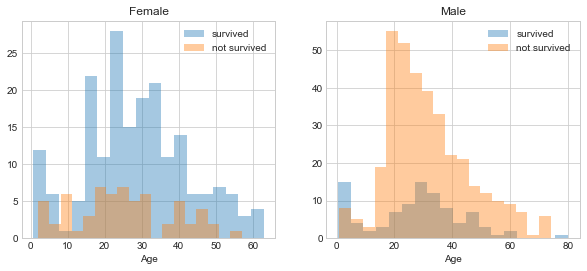

In [9]:
#Age & Gender 

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=18, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=18, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

#Suggestion: add age groups, since there seems to be age groups where the survival rates tend to increase

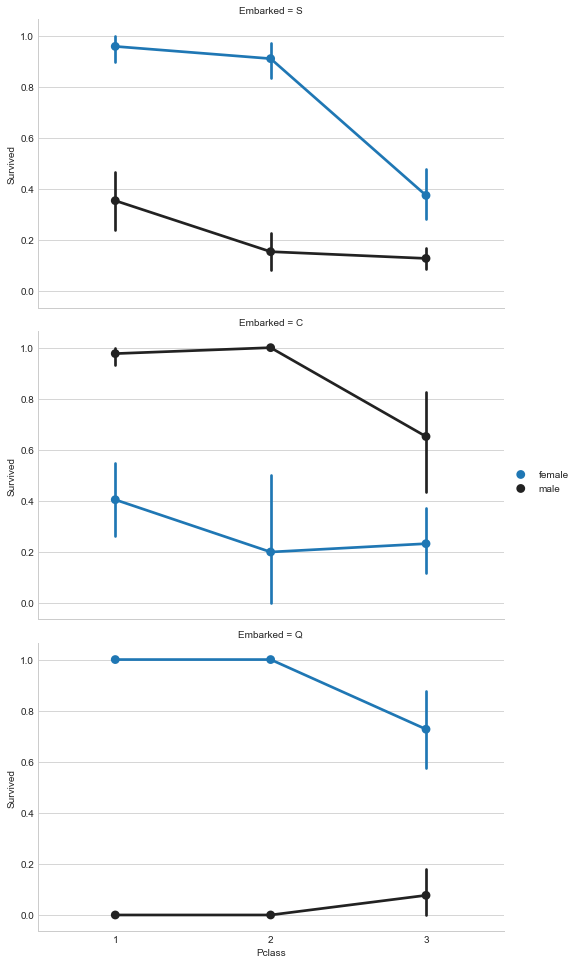

In [10]:
#Embarked, Pclass & Gender 

FacetGrid = sns.FacetGrid(train_data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

#Observations:
    #Women on port Q and on port S have a higher chance of survival. 
    #The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, 
    #but a low probability if they are on port Q or S.
    
    #Pclass is also correlated with Survival.

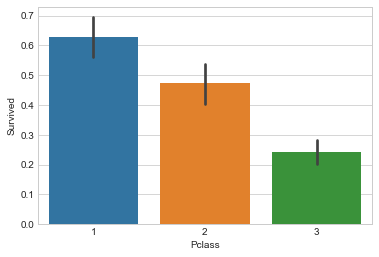

In [11]:
#Analysing Pclass

sns.barplot(x='Pclass', y='Survived', data=train_data)

#Class 1 has the highest survival rate

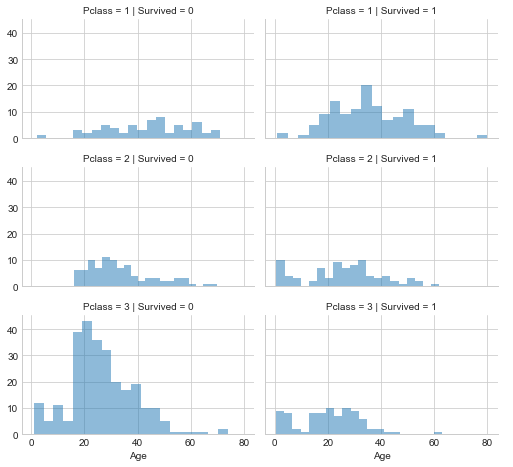

In [12]:
#Further analysis on Pclass

grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#This plot confirms the assumption about Pclass 1, and shows that Pclass 3 has a lower survival rate probability.

In [13]:
#SibSp & Parch
    #These two columns would make more sense if combined.
    #Suggestion: add a new column that shows if someone is alone or with a relative.
    
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'alone'] = 1
    dataset['alone'] = dataset['alone'].astype(int)
train_data['alone'].value_counts()

1    537
0    354
Name: alone, dtype: int64

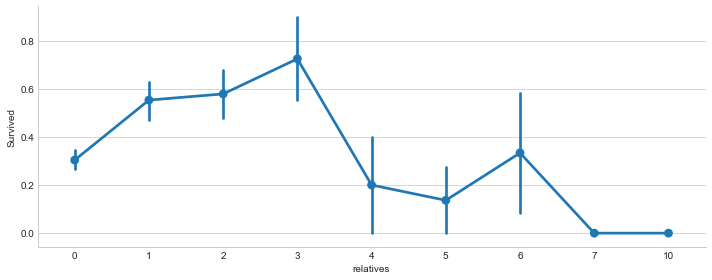

In [14]:
#Relatives vs survival rate 

axes = sns.factorplot('relatives','Survived', 
                      data=train_data, aspect = 2.5, )

#Highest survival probability when you have 1 - 3 relatives

In [15]:
#Data preprocessing, dropping passenger ID since it does not contribute to anything

#train_data = train_data(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
#train_data = train_data.drop(['SibSp', 'Parch'], axis=1)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [16]:
#handeling missing data [Cabin (687), Embarked (2) and Age (177)]

#For cabin: Ex. C123, C refers to the deck

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_data, test_data]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


In [17]:
#Missing age Values

data = [train_data, test_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)
train_data["Age"].isnull().sum()

0

In [18]:
#Embarked missing values 

train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
common_value = 'S'
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
relatives      891 non-null int64
alone          891 non-null int32
Deck           891 non-null int32
dtypes: float64(1), int32(3), int64(6), object(4)
memory usage: 87.1+ KB


In [21]:
#Converting fare to int 

data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [22]:
#Names 
#Get a new feature out of names according to titles

data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)


In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,alone,Deck,Title
0,1,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1
1,2,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3
2,3,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,4,1,1,female,35,1,0,113803,53,S,1,0,3,3
4,5,0,3,male,35,0,0,373450,8,S,0,1,8,1


In [24]:
#Convert Sex into numeric

genders = { 'male': 0, 'female': 1}

data = [train_data, test_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,alone,Deck,Title
0,1,0,3,0,22,1,0,A/5 21171,7,S,1,0,8,1
1,2,1,1,1,38,1,0,PC 17599,71,C,1,0,3,3
2,3,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,4,1,1,1,35,1,0,113803,53,S,1,0,3,3
4,5,0,3,0,35,0,0,373450,8,S,0,1,8,1


In [26]:
#Ticket

train_data['Ticket'].describe()

#not a useful feature, so I will drop it from the dataframe

train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title
0,1,0,3,0,22,1,0,7,S,1,0,8,1
1,2,1,1,1,38,1,0,71,C,1,0,3,3
2,3,1,3,1,26,0,0,7,S,0,1,8,2
3,4,1,1,1,35,1,0,53,S,1,0,3,3
4,5,0,3,0,35,0,0,8,S,0,1,8,1


In [27]:
#Embarked: converting it to numeric 

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [28]:
#Creating categories for age and fare

#Age: 

data = [train_data, test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed
train_data['Age'].value_counts()

4    183
6    158
5    141
3    137
2    114
1     90
0     68
Name: Age, dtype: int64

In [29]:
#Fare: 

pd.qcut(train_data['Fare'],6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
5         (7.0, 8.0]
6       (26.0, 52.0]
7       (14.0, 26.0]
8        (8.0, 14.0]
9       (26.0, 52.0]
10      (14.0, 26.0]
11      (14.0, 26.0]
12        (7.0, 8.0]
13      (26.0, 52.0]
14     (-0.001, 7.0]
15      (14.0, 26.0]
16      (26.0, 52.0]
17       (8.0, 14.0]
18      (14.0, 26.0]
19     (-0.001, 7.0]
20      (14.0, 26.0]
21       (8.0, 14.0]
22        (7.0, 8.0]
23      (26.0, 52.0]
24      (14.0, 26.0]
25      (26.0, 52.0]
26     (-0.001, 7.0]
27     (52.0, 512.0]
28     (-0.001, 7.0]
29     (-0.001, 7.0]
           ...      
861      (8.0, 14.0]
862     (14.0, 26.0]
863    (52.0, 512.0]
864      (8.0, 14.0]
865      (8.0, 14.0]
866      (8.0, 14.0]
867     (26.0, 52.0]
868      (8.0, 14.0]
869      (8.0, 14.0]
870    (-0.001, 7.0]
871     (26.0, 52.0]
872    (-0.001, 7.0]
873      (8.0, 14.0]
874     (14.0, 26.0]
875    (-0.001, 7.0]
876      (8.0, 14.0]
877    (-0.00

In [30]:
data = [train_data, test_data]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [31]:
#Adding new features based on the columns I already have 

#Age times class

data = [train_data, test_data]

for dataset in data:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']


In [32]:
#Fare per person

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title,Age_Class,Fare_Per_Person
0,1,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,2,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,3,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,4,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,5,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,6,0,3,0,1,0,0,1,2,0,1,8,1,3,1
6,7,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,8,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,9,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,10,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [33]:
train_data.drop(['PassengerId'], axis=1, inplace = True)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1


In [34]:
#Building the machine learning model:

X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

In [35]:
#Model #1: Stochastic Gradient Decent: 

sgd = sklearn.linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

NameError: name 'sklearn' is not defined

In [ ]:
#Model #2: Random Forest:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [ ]:
#Model #3: Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [ ]:
#Model #4: K Nearest Neighbor:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [ ]:
#Model #5: Gaussian Naive Bayes:

from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [ ]:
#Model #6: Perceptron:

from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=5)

perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [ ]:
#Model #7: Linear Support Vector Machine:

from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [ ]:
#Model #8: Decision Tree:

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [ ]:
#Choosing the best model: 

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

In [ ]:
#Random forest classifier goes in first place. 
#Next step is to check how it works using Cross Validation (K-folds Cross Validation).

In [ ]:
#K-folds Cross Validation, using K=10

from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

#Results: model has a average accuracy of 82% with a standard deviation of 4%. 
#The standard deviation shows, how precise the estimates are.

In [ ]:
#Feature importance 

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

In [ ]:
importances.plot.bar()

In [ ]:
#Conclusion: alone & Parch are not very significant in the model, so I will remove them from the datasets

train_data  = train_data.drop("alone", axis=1)
test_data  = test_data.drop("alone", axis=1)

train_data  = train_data.drop("Parch", axis=1)
test_data  = test_data.drop("Parch", axis=1)

In [ ]:
#Training the Random Forest Model again, without the alone and Parch columns

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

In [37]:
#Using out-of-bag samples to estimate the generalization accuracy.
#Note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. 

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.39 %


In [ ]:
#Hyperparameter Tuning: (Choosing the best parameters to use for the Random Forest model)

#param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
#from sklearn.model_selection import GridSearchCV, cross_val_score
#rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
#clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
#clf.fit(X_train, Y_train)
#clf.bestparams

#Commented because it takes a long time to run 

In [36]:
# Random Forest, testing new parameters 

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.39 %


In [38]:
#Further evalutions 
#Confusion Matrix:

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

#Output: first row is about the not-survived-predictions, 487 correctly defined as not survived, 62 wrongly defined as not survived 
#Same goes for the 2nd row

array([[487,  62],
       [ 93, 249]], dtype=int64)

In [39]:
#Precision and Recall:

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

#The model predicts 81% of the time, a passengers survival correctly (precision). 
#The recall tells us that it predicted the survival of 73 % of the people who actually survived.

Precision: 0.8006430868167203
Recall: 0.7280701754385965


In [40]:
#F-score: 

from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7626339969372129

In [41]:
#Finally, running the model on the test data and outputting it

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)


0.8900112233445566

In [44]:
print(Y_prediction)

X_test.head()

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 1 1 0 1 1 0 0 1 0 0 1]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,2,0,0,0,2,0,1,8,1,6,0
1,3,1,5,1,0,0,0,1,0,8,3,15,0
2,2,0,3,0,0,1,2,0,1,8,1,6,1
3,3,0,5,0,0,1,0,0,1,8,1,15,1
4,3,1,5,1,1,1,0,2,0,8,3,15,0


In [46]:
#save data in the format needed 
output = pd.DataFrame({'Survival': Y_prediction})

output.to_csv('Titanic Submission.csv', index=False)